## Rozwiązanie lab 3

In [29]:
from PIL import Image, ImageDraw, ImageFont

In [112]:
def draw_word(text, change=None):
    m = len(text)
    d = 40
    img = Image.new(mode="RGB", size=(d*m, d), color=(176, 165, 155))

    draw = ImageDraw.Draw(img)
    for i in range(m + 1):
        draw.line([(i*d, 0), (i*d, d)], width=1, fill=(0, 0, 0))

    if change is not None:
        index, color = change
        draw.rectangle([(index*d, 0), ((index + 1)*d, d)], fill=color)

    font = ImageFont.truetype("arial.ttf", 20)
    for i in range(m):
        draw.text((i*d + d/2.5, d / 4), text=text[i], font=font, fill=(0, 0, 0))
    display(img)

In [141]:
def visualise_edits(text1, text2, dp, parent):
    t1 = list(text1)
    i = len(text1)
    j = len(text2)
    draw_word(t1)
    print()
    while dp[i][j]:
        if parent[i][j] == 0:
            i -= 1
            j -= 1
            continue
        elif parent[i][j] == 1:
            i -= 1
            j -= 1
            old, t1[i] = t1[i], text2[j]
            draw_word(t1, (i, 'green'))
            print(f"Zamiana {old} na {text2[j]}")
        elif parent[i][j] == 2:
            i -= 1
            draw_word(t1, (i, 'red'))
            print(f"Usunięcie {t1[i]}")
            t1.pop(i)
            draw_word(t1)
        else:
            j -= 1
            t1.insert(i, text2[j])
            draw_word(t1, (i, 'green'))
            print(f"Dodanie {text2[j]}")
        print()
    draw_word(t1)


#### Algorytm obliczania odległości edycyjnej

In [142]:
from math import inf

def edit_distance(text1, text2, visualise=False):
    m = len(text1)
    n = len(text2)
    dp = [[inf for _ in range(n + 1)] for _ in range(m + 1)]
    parent = [[-1 for _ in range(n + 1)] for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for i in range(n + 1):
        dp[0][i] = i

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if text1[i-1] == text2[j - 1]:
                dp[i][j] = dp[i-1][j-1]
                parent[i][j] = 0
            else:
                dp[i][j] = dp[i-1][j-1] + 1
                parent[i][j] = 1
                if dp[i][j] > dp[i-1][j] + 1:
                    dp[i][j] = dp[i-1][j] + 1
                    parent[i][j] = 2
                if dp[i][j] > dp[i][j - 1] + 1:
                    dp[i][j] = dp[i][j - 1] + 1
                    parent[i][j] = 3
    if visualise:
        visualise_edits(text1, text2, dp, parent)
    return dp[-1][-1], dp, parent

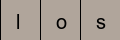

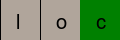

Zamiana s na c



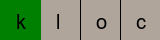

Dodanie k



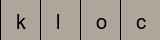

In [143]:
_ = edit_distance("los", "kloc", visualise=True)

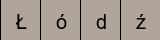

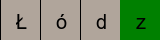

Zamiana ź na z



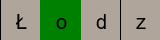

Zamiana ó na o



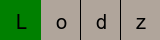

Zamiana Ł na L



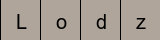

In [144]:
_ = edit_distance("Łódź", "Lodz", visualise=True)

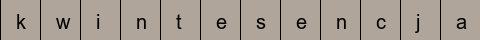

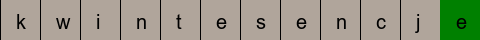

Zamiana a na e



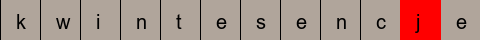

Usunięcie j


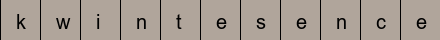

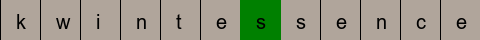

Dodanie s



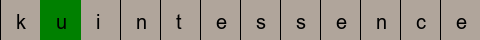

Zamiana w na u



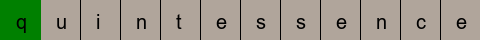

Zamiana k na q



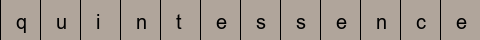

In [145]:
_ = edit_distance("kwintesencja", "quintessence", visualise=True)

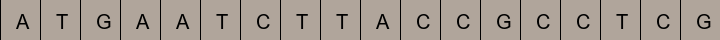

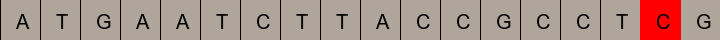

Usunięcie C


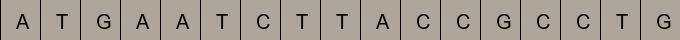

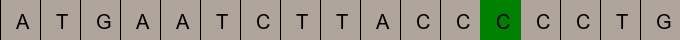

Zamiana G na C



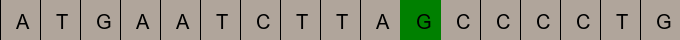

Zamiana C na G



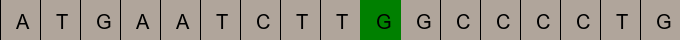

Zamiana A na G



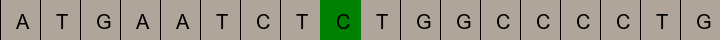

Dodanie C



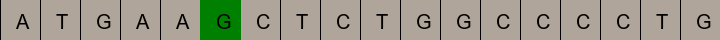

Zamiana T na G



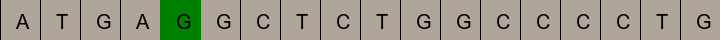

Zamiana A na G



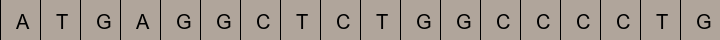

In [146]:
_ = edit_distance("ATGAATCTTACCGCCTCG", "ATGAGGCTCTGGCCCCTG", visualise=True)